# Final Project: Predictive Modeling of Camp Town fire Using fire Data

## Introduction：

Cape Town is a very beautiful city with delicious cuisine and beautiful views, and a very important part of every Cape Town life: the bush fire.

Bush fires are an important part of South Africa's ecosystem. According to official reports, about 90% of the western Cape Town bush fires were caused by human accidents. For example, it may be a cigarette dropped by a passerby, it may be the burning of garbage without permission, an unattended bonfire, a falling wire, etc.

In addition to these man-made factors, with the global climate change, more and more natural factors have become the cause of fires. About 10% of jungle fires are caused by certain environmental factors, including hurricanes, high temperatures, excessive dryness, Seasonal climate change, lightning and more.

Based on the above reasons, this project will study the natural causes of bush fires in the Cape Town area in the past and propose a prediction model. Finally, predict whether there will be a jungle fire based on the weather conditions (such as temperature) of the day.

From January 2009 to September 2017, there were almost 88,480 records of vegetation fires. The 2016-2017 data is stored through the database, so before I start, I manually organize all the data into a csv file for later use. The Cape Town City portal stores this data in the OpenOffice spreadsheet format, and thanks for their contribution to this data.

## Rearch Question：

Using weather data from Cape Town ’s historical forest fire data, the main problem we studied for this project was to create a model that was provided to Cape Town locals or tourists who have plans to go to Cape Town. Or an expert on forest fires, it can predict whether a bush fire may occur in the moment (time when you use this model) or within three days (timed from the time you use this model), and contains an analysis of trends ( For seasons, months and certain days, etc.).

Forest fires will have very final consequences, including human and financial resources, and are irreversible losses. For the prediction of whether a bush fire will occur, the relevant responsible departments can be prepared in advance, such as evacuating personnel in advance and preparing fire extinguishing equipment in advance to minimize personal and environmental losses.

## Data Acquisition, Data Preparation：

### Data Acquisition:
#### About dataset: 
For this project, I used the following websites to get information:

1.dataset from [Vegetation fires in Cape Town] (https://www.kaggle.com/pinsleepe/vegetation-fires-in-cape-town)

2.original data from [City of Cape Town Open Data Portal-Fire incidence] (https://web1.capetown.gov.za/web1/OpenDataPortal/DatasetDetail?DatasetName=Fire%20incidence): Various types of fire incidence in Cape Town from January 2017 to December 2017.

3.manually converted csv files [zemblanity's github] (https://raw.githubusercontent.com/pinsleepe/zemblanity/master/table_mountain_fire/fire_log_cape_town.csv)


#### About today weather condition:(API)

Collection of real-time weather data [openWeather-Current weather data] (https://openweathermap.org/current): The API can be based on the name of the region or country entered, city ID (officially provided comparison table), geographical coordinates And zip code to return real-time weather conditions. The return value is a json file containing a description of the weather conditions, temperature, humidity, wind speed, wind direction, visibility and other information. In addition, you can also learn that the target city is the center, JSON returns data from cities laid within definite circle that is specified by center point ('lat', 'lon') and expected number of cities ('cnt') around this point. The default number of cities is 10, the maximum is 50.

##### API KEY : 456aa59f25f0f2ba427ad5a80e1c0632


### Data Preparation for Analysis:

1 csv file as the dataset to set the modeling, and openweather API to generate the weather conditions of today or future 5 days.

**Although most of my data exists in the form of discrete values, it does not affect our analysis of the data and subsequent predictions, because the discrete values also exist in the form of intervals. Enough to learn from.**

####  Cleaning up the dataset 

1. Import and read CSV file
2. Clean 'Description_of_Incident', 'Wind', 'Temperature' column to remove whitespaces and special characters.
3. Drops extra and unnecessary columns from new dataframe
5. Transform Datetime columns from string to Date and Time to be able to next analysis
7. Extract month, weekday and replace columns to the names of the actual months and weekdays
5. Devide the months into four seasons
8. Replace the Temperature column into number string


In [1]:
import numpy as np
import pandas as pd
import time
import re
from datetime import datetime

In [2]:
fire_df = pd.read_csv('https://raw.githubusercontent.com/zhijing-zhang/DAV-5400/master/fire_log_cape_town.csv')
fire_df.head()

,Incident_category,District,Description_of_Incident,Wind,Details_of_cause,Source_of_water,Temperature,Fire_Damage_-_Details,Suburb,FPA_Classification,Street,What_Was_Burning,Equipment_used,Incident_number,Weather,FPA_Occupancy,Incident_sub-category,Actions_of_Brigade,Datetime
0,Other,North,False Alarm,NaN,False Alarm,NaN,NaN,NaN,BOTHASIG,False Alarm - Malicious,BUREN STREET,NaN,NaN,F0901/0001,NaN,NaN,Rubbish/Grass/Bush,No Call Found,2009-01-01 00:03:00
1,Other,West,Minor Vegetation Fire,Light Breeze,Ignited Signal Flare Dropping Into Reeds And I...,WT,10 - 15 Deg,Small Area Of Reeds Burnt.,FROGMORE ESTATE,Fire - manually extinguished,Lake Road,Small Area Of Reeds,2 X Hosereels,F0901/0002,Fine,"Other|Rubbish, Grass & Bush",Rubbish/Grass/Bush,Extinguished With Two Fog Jets From Whiskey 14...,2009-01-01 00:07:00
2,Other,East,Minor Vegetation Fire,Light Breeze,Unknown,MP,15 - 20 Deg,NaN,TAFELSIG,Fire - manually extinguished,Tafelberg Road,Grass,1xfogjet,F0901/0004,Fine,"Other|Rubbish, Grass & Bush",Rubbish/Grass/Bush,Extinguished Fire With 1xfogjet From E.27(1000...,2009-01-01 00:16:00
3,Other,North,False Alarm,Moderate,Undetermined,NaN,15 - 20 Deg,NaN,ATLANTIS,False Alarm - Malicious,Karria Street,Nil,Nil,F0901/0006,Fine,"Other|Rubbish, Grass & Bush",Rubbish/Grass/Bush,Nil,2009-01-01 00:20:00
4,Other,North,Rubbish Fire,Light Breeze,Passer-By Dropping Alight,WT,15 - 20 Deg,Small Quantity Of Tyres Burned,BONTEHEUWEL,Fire - manually extinguished,JAKKALSVLEI AVENUE,Tyres,One X Hose Reel,F0901/0007,Fine,"Other|Rubbish, Grass & Bush",Rubbish/Grass/Bush,Extinguished With One Fog Jet From W18 Water T...,2009-01-01 00:22:00


In [3]:
#clean 'Description_of_Incident', 'Wind', 'Temperature' column to remove whitespaces and special characters.
fire_df.dropna(subset=['Description_of_Incident', 'Wind', 'Temperature'], inplace=True)
# reset the index
fire_df = fire_df.reset_index(drop=True)
fire_df.head()

,Incident_category,District,Description_of_Incident,Wind,Details_of_cause,Source_of_water,Temperature,Fire_Damage_-_Details,Suburb,FPA_Classification,Street,What_Was_Burning,Equipment_used,Incident_number,Weather,FPA_Occupancy,Incident_sub-category,Actions_of_Brigade,Datetime
0,Other,West,Minor Vegetation Fire,Light Breeze,Ignited Signal Flare Dropping Into Reeds And I...,WT,10 - 15 Deg,Small Area Of Reeds Burnt.,FROGMORE ESTATE,Fire - manually extinguished,Lake Road,Small Area Of Reeds,2 X Hosereels,F0901/0002,Fine,"Other|Rubbish, Grass & Bush",Rubbish/Grass/Bush,Extinguished With Two Fog Jets From Whiskey 14...,2009-01-01 00:07:00
1,Other,East,Minor Vegetation Fire,Light Breeze,Unknown,MP,15 - 20 Deg,NaN,TAFELSIG,Fire - manually extinguished,Tafelberg Road,Grass,1xfogjet,F0901/0004,Fine,"Other|Rubbish, Grass & Bush",Rubbish/Grass/Bush,Extinguished Fire With 1xfogjet From E.27(1000...,2009-01-01 00:16:00
2,Other,North,False Alarm,Moderate,Undetermined,NaN,15 - 20 Deg,NaN,ATLANTIS,False Alarm - Malicious,Karria Street,Nil,Nil,F0901/0006,Fine,"Other|Rubbish, Grass & Bush",Rubbish/Grass/Bush,Nil,2009-01-01 00:20:00
3,Other,North,Rubbish Fire,Light Breeze,Passer-By Dropping Alight,WT,15 - 20 Deg,Small Quantity Of Tyres Burned,BONTEHEUWEL,Fire - manually extinguished,JAKKALSVLEI AVENUE,Tyres,One X Hose Reel,F0901/0007,Fine,"Other|Rubbish, Grass & Bush",Rubbish/Grass/Bush,Extinguished With One Fog Jet From W18 Water T...,2009-01-01 00:22:00
4,Other,North,Minor Vegetation Fire,Moderate,Unknown,MP,15 - 20 Deg,Small Area Of Grass,EPPING 1,Fire - manually extinguished,OFF GUNNERS CIRCLE,Grass,1x Jet From Whiskey 19,F0901/0020,Clear,"Other|Rubbish, Grass & Bush",Rubbish/Grass/Bush,Fire Extinguished And Area Made Safe,2009-01-01 01:25:00


In [4]:
#drops extra and unnecessary columns from new dataframe
fire_sub = fire_df.iloc[:, [0, 2, 3, 4, 6, -5, -1]].copy()
fire_sub.head()

,Incident_category,Description_of_Incident,Wind,Details_of_cause,Temperature,Weather,Datetime
0,Other,Minor Vegetation Fire,Light Breeze,Ignited Signal Flare Dropping Into Reeds And I...,10 - 15 Deg,Fine,2009-01-01 00:07:00
1,Other,Minor Vegetation Fire,Light Breeze,Unknown,15 - 20 Deg,Fine,2009-01-01 00:16:00
2,Other,False Alarm,Moderate,Undetermined,15 - 20 Deg,Fine,2009-01-01 00:20:00
3,Other,Rubbish Fire,Light Breeze,Passer-By Dropping Alight,15 - 20 Deg,Fine,2009-01-01 00:22:00
4,Other,Minor Vegetation Fire,Moderate,Unknown,15 - 20 Deg,Clear,2009-01-01 01:25:00


In [5]:
# Transform Datetime columns from string to Date and Time to be able to next analysis
DT_list = fire_sub['Datetime']
month = []
hour = []
day = []
for i in range(len(DT_list)):
    # get months
    m = datetime.strptime(DT_list[i], '%Y-%m-%d %H:%M:%S').date().month
    month.append(str(m))
    # get Time(Hour)
    h = datetime.strptime(DT_list[i], '%Y-%m-%d %H:%M:%S').time().hour
    hour.append(str(h))
    # get Weekday
    d = datetime.strptime(DT_list[i], '%Y-%m-%d %H:%M:%S').date().weekday()
    day.append(str(d))
 
#print(month)
#print(hour)
#print(day)

In [6]:
# show the new columns
fire_sub['Month'] = month
fire_sub['Hour'] = hour
fire_sub['Day'] = day
fire_sub.head()
#fire_sub.drop(['Datetime'],axis=1, inplace = True)

,Incident_category,Description_of_Incident,Wind,Details_of_cause,Temperature,Weather,Datetime,Month,Hour,Day
0,Other,Minor Vegetation Fire,Light Breeze,Ignited Signal Flare Dropping Into Reeds And I...,10 - 15 Deg,Fine,2009-01-01 00:07:00,1,0,3
1,Other,Minor Vegetation Fire,Light Breeze,Unknown,15 - 20 Deg,Fine,2009-01-01 00:16:00,1,0,3
2,Other,False Alarm,Moderate,Undetermined,15 - 20 Deg,Fine,2009-01-01 00:20:00,1,0,3
3,Other,Rubbish Fire,Light Breeze,Passer-By Dropping Alight,15 - 20 Deg,Fine,2009-01-01 00:22:00,1,0,3
4,Other,Minor Vegetation Fire,Moderate,Unknown,15 - 20 Deg,Clear,2009-01-01 01:25:00,1,1,3


In [7]:
#extract month, weekday and replace columns to the names of the actual months and weekdays
#give meaningful names to the weekday
fire_sub.Day.replace({'0':'Sunday',
                            '1':'Monday',
                             '2':'Tuesday',
                             '3':'Wednesday',
                             '4':'Thursday',
                             '5':'Friday',
                             '6':'Saturday'}, inplace = True) 
fire_sub.head()

,Incident_category,Description_of_Incident,Wind,Details_of_cause,Temperature,Weather,Datetime,Month,Hour,Day
0,Other,Minor Vegetation Fire,Light Breeze,Ignited Signal Flare Dropping Into Reeds And I...,10 - 15 Deg,Fine,2009-01-01 00:07:00,1,0,Wednesday
1,Other,Minor Vegetation Fire,Light Breeze,Unknown,15 - 20 Deg,Fine,2009-01-01 00:16:00,1,0,Wednesday
2,Other,False Alarm,Moderate,Undetermined,15 - 20 Deg,Fine,2009-01-01 00:20:00,1,0,Wednesday
3,Other,Rubbish Fire,Light Breeze,Passer-By Dropping Alight,15 - 20 Deg,Fine,2009-01-01 00:22:00,1,0,Wednesday
4,Other,Minor Vegetation Fire,Moderate,Unknown,15 - 20 Deg,Clear,2009-01-01 01:25:00,1,1,Wednesday


In [8]:
#give meaningful names to the months
fire_sub.Month.replace({'1':'January',
                             '2':'February',
                             '3':'March',
                             '4':'April',
                             '5':'May',
                             '6':'June',
                             '7':'July',
                             '8':'August',
                             '9':'September',
                             '10':'October',
                             '11':'November',
                             '12':'December'}, inplace = True) 
fire_sub.head()

,Incident_category,Description_of_Incident,Wind,Details_of_cause,Temperature,Weather,Datetime,Month,Hour,Day
0,Other,Minor Vegetation Fire,Light Breeze,Ignited Signal Flare Dropping Into Reeds And I...,10 - 15 Deg,Fine,2009-01-01 00:07:00,January,0,Wednesday
1,Other,Minor Vegetation Fire,Light Breeze,Unknown,15 - 20 Deg,Fine,2009-01-01 00:16:00,January,0,Wednesday
2,Other,False Alarm,Moderate,Undetermined,15 - 20 Deg,Fine,2009-01-01 00:20:00,January,0,Wednesday
3,Other,Rubbish Fire,Light Breeze,Passer-By Dropping Alight,15 - 20 Deg,Fine,2009-01-01 00:22:00,January,0,Wednesday
4,Other,Minor Vegetation Fire,Moderate,Unknown,15 - 20 Deg,Clear,2009-01-01 01:25:00,January,1,Wednesday


In [10]:
#creates a copy of StartMonth column and add a new column called Season 
##replaces value of months to the season 
fire_sub['Season'] = fire_sub['Month'] 
fire_sub.Season.replace({'January':'Summer',
                         'February':'Summer',
                         'March':'Fall',
                         'April':'Fall',
                         'May':'Fall',
                         'June':'Winter',
                         'July':'Winter',
                         'August':'Winter',
                         'September':'Spring',
                         'October':'Spring',
                         'November':'Spring',
                         'December':'Summer'}, inplace = True) 
#print(fire_sub.head())

fire_sub.head()

,Incident_category,Description_of_Incident,Wind,Details_of_cause,Temperature,Weather,Datetime,Month,Hour,Day,Season
0,Other,Minor Vegetation Fire,Light Breeze,Ignited Signal Flare Dropping Into Reeds And I...,10 - 15 Deg,Fine,2009-01-01 00:07:00,January,0,Wednesday,Summer
1,Other,Minor Vegetation Fire,Light Breeze,Unknown,15 - 20 Deg,Fine,2009-01-01 00:16:00,January,0,Wednesday,Summer
2,Other,False Alarm,Moderate,Undetermined,15 - 20 Deg,Fine,2009-01-01 00:20:00,January,0,Wednesday,Summer
3,Other,Rubbish Fire,Light Breeze,Passer-By Dropping Alight,15 - 20 Deg,Fine,2009-01-01 00:22:00,January,0,Wednesday,Summer
4,Other,Minor Vegetation Fire,Moderate,Unknown,15 - 20 Deg,Clear,2009-01-01 01:25:00,January,1,Wednesday,Summer


Please note here that Cape Town is the capital of South Africa. In the southern hemisphere, the season is opposite to the north.

In [11]:
# replace the Temperature column into number string
fire_sub.Temperature.replace({'0 - 10 Deg' : '0 - 10',
                              '10 - 15 Deg' : '10 - 15',
                              '15 - 20 Deg' : '15 - 20',
                              '20 - 25 Deg' : '20 - 25',
                              '25 - 30 Deg' : '25 - 30',
                             "Over 30 Deg":"> 30"}, inplace = True)
fire_sub.head() 

,Incident_category,Description_of_Incident,Wind,Details_of_cause,Temperature,Weather,Datetime,Month,Hour,Day,Season
0,Other,Minor Vegetation Fire,Light Breeze,Ignited Signal Flare Dropping Into Reeds And I...,10 - 15,Fine,2009-01-01 00:07:00,January,0,Wednesday,Summer
1,Other,Minor Vegetation Fire,Light Breeze,Unknown,15 - 20,Fine,2009-01-01 00:16:00,January,0,Wednesday,Summer
2,Other,False Alarm,Moderate,Undetermined,15 - 20,Fine,2009-01-01 00:20:00,January,0,Wednesday,Summer
3,Other,Rubbish Fire,Light Breeze,Passer-By Dropping Alight,15 - 20,Fine,2009-01-01 00:22:00,January,0,Wednesday,Summer
4,Other,Minor Vegetation Fire,Moderate,Unknown,15 - 20,Clear,2009-01-01 01:25:00,January,1,Wednesday,Summer


In [12]:
#creates copy of the original data subset
fire = fire_sub.copy()
fire.head()

,Incident_category,Description_of_Incident,Wind,Details_of_cause,Temperature,Weather,Datetime,Month,Hour,Day,Season
0,Other,Minor Vegetation Fire,Light Breeze,Ignited Signal Flare Dropping Into Reeds And I...,10 - 15,Fine,2009-01-01 00:07:00,January,0,Wednesday,Summer
1,Other,Minor Vegetation Fire,Light Breeze,Unknown,15 - 20,Fine,2009-01-01 00:16:00,January,0,Wednesday,Summer
2,Other,False Alarm,Moderate,Undetermined,15 - 20,Fine,2009-01-01 00:20:00,January,0,Wednesday,Summer
3,Other,Rubbish Fire,Light Breeze,Passer-By Dropping Alight,15 - 20,Fine,2009-01-01 00:22:00,January,0,Wednesday,Summer
4,Other,Minor Vegetation Fire,Moderate,Unknown,15 - 20,Clear,2009-01-01 01:25:00,January,1,Wednesday,Summer


## Exploratory Data Analysis: 

1.Do describe() for the discrete values

2.Show the distribution of data for each of the columns：Season, Wind, Temperature

3.Show edible and poisonous mushroom in different cap color, odor and habitat.

4.Analyze whether the predictor variables identified are helpful in determining whether a mushroom is edible or not using visualizations

In [13]:
# for discrete values to do describe
fire.describe()

,Incident_category,Description_of_Incident,Wind,Details_of_cause,Temperature,Weather,Datetime,Month,Hour,Day,Season
count,55836,55836,55836,47986,55836,55761,55836,55836,55836,55836,55836
unique,28,47,5,6702,6,7,55836,12,24,7,4
top,Other,Minor Vegetation Fire,Light Breeze,Passer-By Dropping A Light,20 - 25,Fine,2016-01-07 13:52:00,January,14,Monday,Summer
freq,49971,26895,34795,7045,19525,32053,1,11114,5031,8276,27350


##### Finding:

This result shows that in the jungle fires that occurred in Cape Town from 2009 to 2017, the most fire type was Minor Vegetation Fire, and the general wind was Light Breeze. The cause of the fire was mostly due to Passer-By Dropping A Light. The local The temperature stays at 20-25 degrees Celsius, weather conditions are mostly fine, and fires mostly occur in summer, which is the same with the offical data.

The results of this analysis are consistent with what we mentioned at the beginning of the official guide in Cape Town that this is a place with pleasant scenery, moderate climate and good natural landscape.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

##### Find the rows whose Description_of_Incident covers 'Vegetation'

In [43]:
# define the text
indexl = []
text = []
text = fire['Description_of_Incident']

# using regular expression to find the Description_of_Incident covers 'Vegetation'
for i in range(len(text)):
    if re.search(r"\bVegetation\b", text[i]):
        indexl.append(text[i])
        #print(text[i] + " TRUE")

# a new dataframe with rows whose Description_of_Incident covers 'Vegetation'
fire_veg1 = fire.loc[fire['Description_of_Incident'].isin(indexl)]
fire_veg1.head()

,Incident_category,Description_of_Incident,Wind,Details_of_cause,Temperature,Weather,Datetime,Month,Hour,Day,Season
0,Other,Minor Vegetation Fire,Light Breeze,Ignited Signal Flare Dropping Into Reeds And I...,10 - 15,Fine,2009-01-01 00:07:00,January,0,Wednesday,Summer
1,Other,Minor Vegetation Fire,Light Breeze,Unknown,15 - 20,Fine,2009-01-01 00:16:00,January,0,Wednesday,Summer
4,Other,Minor Vegetation Fire,Moderate,Unknown,15 - 20,Clear,2009-01-01 01:25:00,January,1,Wednesday,Summer
5,Other,Minor Vegetation Fire,Light Breeze,Possible Setting Off Of Fire Works Igniting Dr...,15 - 20,Fine,2009-01-01 01:44:00,January,1,Wednesday,Summer
6,Other,Major Vegetation Fire,Light Breeze,The Heat From A Flair,15 - 20,Fine,2009-01-01 02:08:00,January,2,Wednesday,Summer


In [44]:
# get the rows don't have the 'Vegetation'
fire_veg2 = fire.loc[~fire['Description_of_Incident'].isin(indexl)]
fire_veg2.head()

,Incident_category,Description_of_Incident,Wind,Details_of_cause,Temperature,Weather,Datetime,Month,Hour,Day,Season
2,Other,False Alarm,Moderate,Undetermined,15 - 20,Fine,2009-01-01 00:20:00,January,0,Wednesday,Summer
3,Other,Rubbish Fire,Light Breeze,Passer-By Dropping Alight,15 - 20,Fine,2009-01-01 00:22:00,January,0,Wednesday,Summer
7,Other,Rubbish Fire,Light Breeze,NaN,10 - 15,Fine,2009-01-01 03:32:00,January,3,Wednesday,Summer
8,Other,Average Structural Fire,Light Breeze,Unknown By Occupier,10 - 15,Overcast,2009-01-01 04:39:00,January,4,Wednesday,Summer
15,Other,Rubbish Fire,Light Breeze,Passerby Dropping A Light,25 - 30,Clear,2009-01-01 11:47:00,January,11,Wednesday,Summer


##### Now we can compare the effects of seasons, months, different wind speeds, and different temperature sections on mountain fires and vegetation fires.

**1.Impact of seasons on fires vs vegetation fire**

In [16]:
#See how many fires happen on each day of the Season.
#gets count of number of fires by season
fire_season=fire.groupby(['Season']).size().to_frame('Number of Fires') 
fire_season.sort_values(by='Number of Fires',ascending=False,inplace=True)
fire_season

,Number of Fires
Season,
Summer,27350
Fall,12423
Spring,11926
Winter,4137


In [17]:
#See how many vegetation fires happen on each day of the season.
fire_veg_s=fire_veg1.groupby(fire_veg1['Season']).size().to_frame('Number of Vegetation Fires') 
fire_veg_s.sort_values(by='Number of Vegetation Fires',ascending=False,inplace=True)
fire_veg_s

,Number of Vegetation Fires
Season,
Summer,20889
Spring,8499
Fall,7199
Winter,922


In [19]:
# rate of the season
fire_s = fire_veg1['Wind'].groupby(fire_veg1['Season']).count()
sea_pcts = fire_s.apply(lambda x: 100*x/fire_s.sum())
sea_pcts

Season
Fall      19.192727
Spring    22.658562
Summer    55.690634
Winter     2.458077
Name: Wind, dtype: float64

Text(0.5, 1.0, 'Vegetation Incident number')

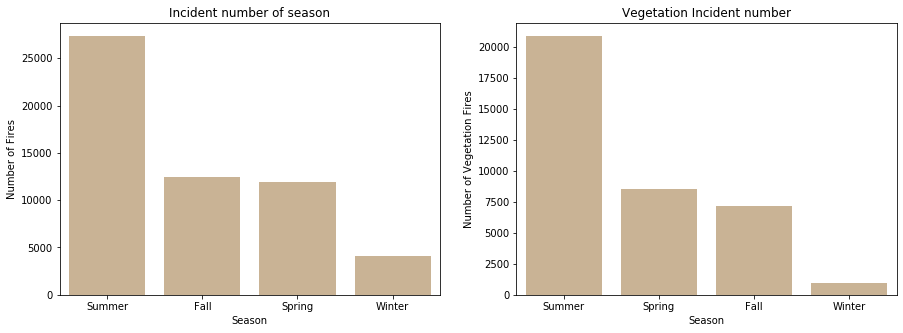

In [20]:
plt.figure(figsize=(15,5))
#plots bar chart of fires per season
plt.subplot(121)
#plt.figure(figsize=(8,4))
sns.barplot(x=fire_season.index,y='Number of Fires',data=fire_season,color='tan')
plt.title('Incident number of season')

#plots line chart of fires per day
plt.subplot(122)
#plt.figure(figsize=(8,4))
sns.barplot(x=fire_veg_s.index,y='Number of Vegetation Fires',data=fire_veg_s,color='tan');
plt.title('Vegetation Incident number')

##### Finding：

From these two comparisons, it can be seen that in Cape Town, the number of mountain fires in winter is the smallest, and the number of fires in summer is the highest. The probability of fires in vegetation in spring is greater than in autumn.

**2.Impact of month on fires vs vegetation fire**

In [21]:
#See how many fires happen on each day of the month.
#gets count of number of fires by month
fire_month=fire.groupby(['Month']).size().to_frame('Number of Fires') 
fire_month
fire_month.index = pd.CategoricalIndex(fire_month.index, 
                               categories=['January', 'February', 'March', 'April','May','June', 'July', 'August','September', 'October', 'November', 'December'], 
                               ordered=True) #assigns months as categorical indices to be able to use it to sort the bar chart by month
fire_month = fire_month.sort_index()
fire_month

,Number of Fires
Month,
January,11114
February,8549
March,6433
April,3919
May,2071
June,1332
July,1430
August,1375
September,1636


In [22]:
#See how many vegetation fires happen on each day of the Month.
fire_veg1 = fire.loc[fire['Description_of_Incident'].isin(indexl)]
fire_veg_m=fire_veg1.groupby(fire_veg1['Month']).size().to_frame('Number of Vegetation Fires') 
fire_veg_m

,Number of Vegetation Fires
Month,
April,2149
August,339
December,6005
February,6356
January,8528
July,320
June,263
March,4322
May,728


Text(0.5, 1.0, 'Vegetation Incident number')

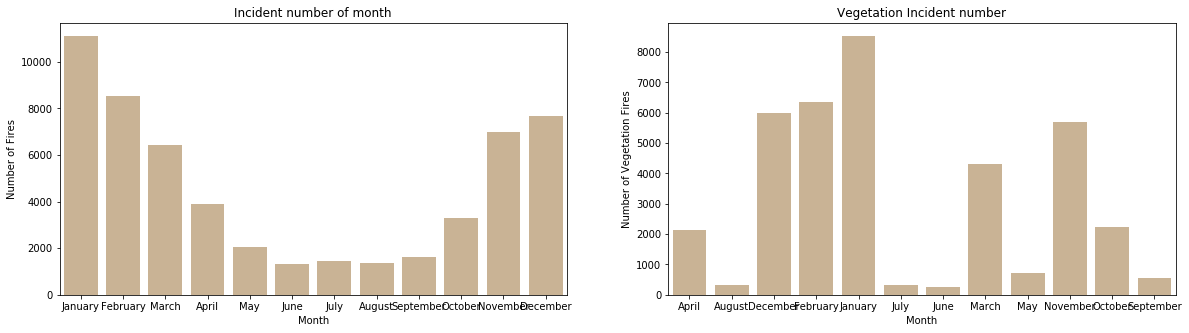

In [23]:
plt.figure(figsize=(20,5))
plt.subplot(121)
#plots bar chart of fires per month
sns.barplot(x=fire_month.index,y='Number of Fires',data=fire_month,color='tan'); 
plt.title('Incident number of month')

#plots line chart of fires per day
plt.subplot(122)
sns.barplot(x=fire_veg_m.index,y='Number of Vegetation Fires',data=fire_veg_m,color='tan');
plt.title('Vegetation Incident number')

##### Finding：

This result is consistent with the analysis of the seasons above. Please note that Cape Town is the capital of South Africa. In the southern hemisphere, the seasons are opposite to the north.

**3.Impact of weekday on fires vs vegetation fire**

In [24]:
fire_day=fire.groupby(fire['Day']).size().to_frame('Number of Fires') 
fire_day

,Number of Fires
Day,
Friday,7800
Monday,8276
Saturday,7841
Sunday,8116
Thursday,8104
Tuesday,7806
Wednesday,7893


In [25]:
fire_veg=fire_veg1.groupby(fire_veg1['Day']).size().to_frame('Number of Vegetation Fires') 
fire_veg

,Number of Vegetation Fires
Day,
Friday,5278
Monday,5531
Saturday,5337
Sunday,5408
Thursday,5532
Tuesday,5158
Wednesday,5265


Text(0.5, 1.0, 'Vegetation Incident number')

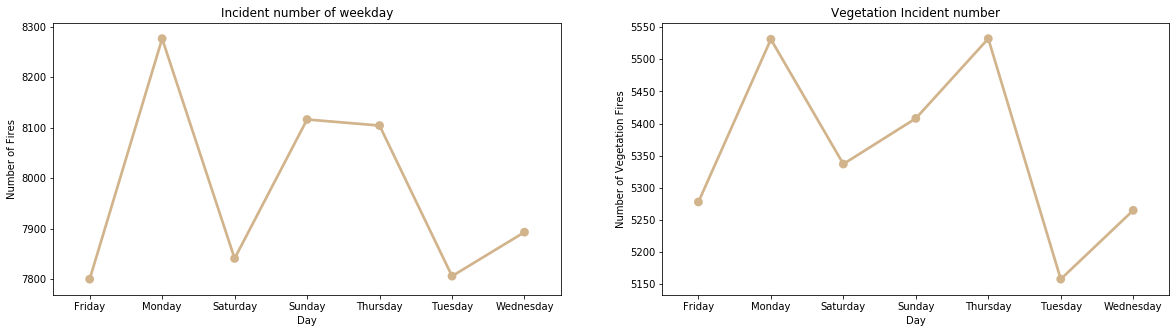

In [26]:
#plots line chart of fires per day
plt.figure(figsize=(20,5))

plt.subplot(121)
sns.pointplot(x=fire_day.index,y='Number of Fires',data=fire_day,color='tan'); 
plt.title('Incident number of weekday')

#plots line chart of fires per day
plt.subplot(122)
sns.pointplot(x=fire_veg.index,y='Number of Vegetation Fires',data=fire_veg,color='tan'); 
plt.title('Vegetation Incident number')


##### Finding：

From this comparison, we can see that the probability of fire on Tuesday is the lowest, and Monday is the highest. According to the official report, 90% of the fires are caused by man-made fire, so it may be caused by people who go hiking on Mondays.

**4.Impact of wind in different season **

### Wind             Speed（Scale）

* Gale-Force       62-74（8）  17-20m/s
* Strong           39-49（6）  11-13.5m/s
* Moderate         20-28（4）  5.5-8m/s
* Light Breeze     6-11（2级） 2-3m/s
* Nil              <1（0）    0.5-1.5m/s


In [27]:
fire1 = fire.loc[fire['Description_of_Incident'].isin(indexl)]

fire_w_s=fire1['Season'].groupby(fire1['Wind']).count()
fire_w_s

Wind
Gale-Force        456
Light Breeze    22413
Moderate         9580
Nil              2977
Strong           2083
Name: Season, dtype: int64

In [28]:
#the rate of every value of wind after the groupby
wind_pcts = fire_w_s.apply(lambda x: 100*x/fire_w_s.sum())
wind_pcts

Wind
Gale-Force       1.215708
Light Breeze    59.753659
Moderate        25.540537
Nil              7.936762
Strong           5.553334
Name: Season, dtype: float64

In [29]:
fire_t_s=fire1['Season'].groupby(fire1['Temperature']).count()
fire_t_s

Temperature
0 - 10       150
10 - 15     2216
15 - 20     8788
20 - 25    14495
25 - 30    10283
> 30        1577
Name: Season, dtype: int64

In [30]:
#the rate of every value of temperature after the groupby
temp_pcts = fire_t_s.apply(lambda x: 100*x/fire_t_s.sum())
temp_pcts

Temperature
0 - 10      0.399904
10 - 15     5.907915
15 - 20    23.429044
20 - 25    38.644059
25 - 30    27.414754
> 30        4.204324
Name: Season, dtype: float64

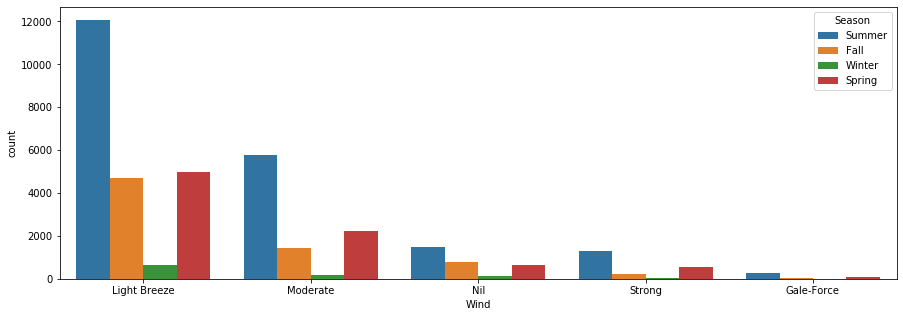

In [31]:
#figure the plot sizse
plt.figure(figsize=(15,5))
#draw a countplot to show the 'cap_color' and 'edible'
sns.countplot(x=fire1['Wind'],hue=fire1['Season'], data=fire1)


##### Finding：

From this we can see that when the wind level is Light Breeze in summer, there are the most fires. Unexpectedly, the higher the wind level, the less likely a fire will occur, which is an interesting phenomenon.

**5.Impact of temperature in different season**

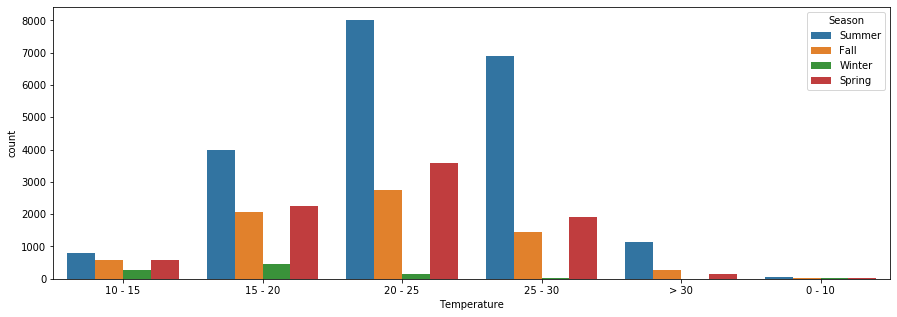

In [32]:
#figure the plot sizse
plt.figure(figsize=(15,5))
#draw a countplot to show the 'cap_color' and 'edible'
sns.countplot(x=fire1['Temperature'],hue=fire1['Season'], data=fire1)

##### Finding：

From this we can see that when the temperature is in about 20-25，there are the most fires. This is not a hot weather for the vegetation fire.

**6. Impact of temperature in different season**

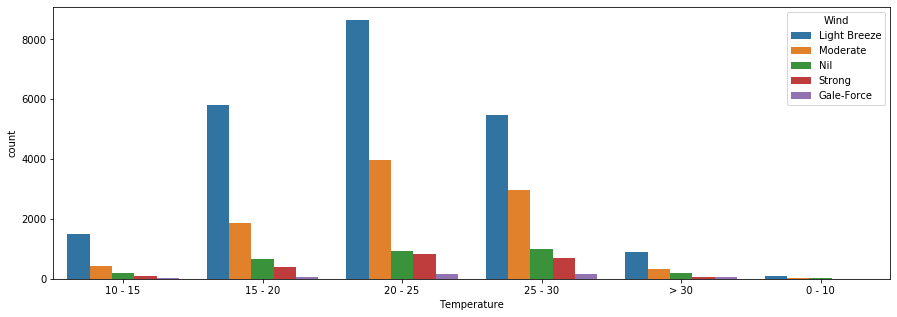

In [33]:
#figure the plot sizse
plt.figure(figsize=(15,5))
#draw a countplot to show the 'cap_color' and 'edible'
sns.countplot(x=fire1['Temperature'],hue=fire1['Wind'], data=fire1)

##### Finding：

This section is the same as the conclusions drawn in the two tables above, confirming our conclusions above. Light Breeze and 20-25 degrees Celsius have the most fires.

**7. Impact of temperature in different season**

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


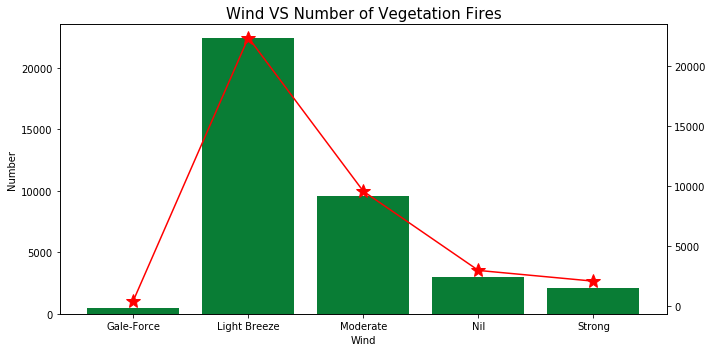

In [34]:
# histogram of section
import matplotlib.pyplot as plt

fire_w_s[0]

y =(fire_w_s.values)
x = (fire_w_s.index)

#size
plt.rcParams['figure.figsize'] = (10.0,5.0)  
fig = plt.figure()
# A bar chart
plt.bar(x,y,align='center') 

ax = fig.add_subplot(111)
ax.bar(x, y, alpha=.7,color='g')

ax.set_xlabel('Wind')
ax.set_ylabel('Number', fontsize=10)
ax.set_title(r'Wind VS Number of Vegetation Fires', fontsize='15')

# add a line
ax2 = ax.twinx()
ax2.plot(x, y, 'r',marker='*',ms=15)

# tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

## Linear Regression Modeling:

In [35]:
fire_pm = fire.iloc[:, [1, 2, 4, -4, -1]].copy()
fire_pm.head()

,Description_of_Incident,Wind,Temperature,Month,Season
0,Minor Vegetation Fire,Light Breeze,10 - 15,January,Summer
1,Minor Vegetation Fire,Light Breeze,15 - 20,January,Summer
2,False Alarm,Moderate,15 - 20,January,Summer
3,Rubbish Fire,Light Breeze,15 - 20,January,Summer
4,Minor Vegetation Fire,Moderate,15 - 20,January,Summer


In [36]:
# only choose the top five
fire_D=fire.groupby(['Description_of_Incident']).size().to_frame('Number of Fires') 
fire_D.sort_values(by='Number of Fires',ascending=False,inplace=True)
fire_D.head(6)

,Number of Fires
Description_of_Incident,
Minor Vegetation Fire,26895
Rubbish Fire,11804
Average Vegetation Fire,9592
False Alarm,2192
Minor Structural Fire,1993
Miscellaneous,1305


In [53]:

fire_veg1.Description_of_Incident = 1
fire_veg1.head()

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Incident_category,Description_of_Incident,Wind,Details_of_cause,Temperature,Weather,Datetime,Month,Hour,Day,Season
0,Other,1,Light Breeze,Ignited Signal Flare Dropping Into Reeds And I...,10 - 15,Fine,2009-01-01 00:07:00,January,0,Wednesday,Summer
1,Other,1,Light Breeze,Unknown,15 - 20,Fine,2009-01-01 00:16:00,January,0,Wednesday,Summer
4,Other,1,Moderate,Unknown,15 - 20,Clear,2009-01-01 01:25:00,January,1,Wednesday,Summer
5,Other,1,Light Breeze,Possible Setting Off Of Fire Works Igniting Dr...,15 - 20,Fine,2009-01-01 01:44:00,January,1,Wednesday,Summer
6,Other,1,Light Breeze,The Heat From A Flair,15 - 20,Fine,2009-01-01 02:08:00,January,2,Wednesday,Summer


In [54]:
fire_veg2.Description_of_Incident = 0
fire_veg2.head()

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Incident_category,Description_of_Incident,Wind,Details_of_cause,Temperature,Weather,Datetime,Month,Hour,Day,Season
2,Other,0,Moderate,Undetermined,15 - 20,Fine,2009-01-01 00:20:00,January,0,Wednesday,Summer
3,Other,0,Light Breeze,Passer-By Dropping Alight,15 - 20,Fine,2009-01-01 00:22:00,January,0,Wednesday,Summer
7,Other,0,Light Breeze,NaN,10 - 15,Fine,2009-01-01 03:32:00,January,3,Wednesday,Summer
8,Other,0,Light Breeze,Unknown By Occupier,10 - 15,Overcast,2009-01-01 04:39:00,January,4,Wednesday,Summer
15,Other,0,Light Breeze,Passerby Dropping A Light,25 - 30,Clear,2009-01-01 11:47:00,January,11,Wednesday,Summer


In [72]:
fire_new =pd.concat([fire_veg1,fire_veg2],axis=0)
fire_new = fire_new.reset_index(drop=True)
fire_new.head()

,Incident_category,Description_of_Incident,Wind,Details_of_cause,Temperature,Weather,Datetime,Month,Hour,Day,Season
0,Other,1,Light Breeze,Ignited Signal Flare Dropping Into Reeds And I...,10 - 15,Fine,2009-01-01 00:07:00,January,0,Wednesday,Summer
1,Other,1,Light Breeze,Unknown,15 - 20,Fine,2009-01-01 00:16:00,January,0,Wednesday,Summer
2,Other,1,Moderate,Unknown,15 - 20,Clear,2009-01-01 01:25:00,January,1,Wednesday,Summer
3,Other,1,Light Breeze,Possible Setting Off Of Fire Works Igniting Dr...,15 - 20,Fine,2009-01-01 01:44:00,January,1,Wednesday,Summer
4,Other,1,Light Breeze,The Heat From A Flair,15 - 20,Fine,2009-01-01 02:08:00,January,2,Wednesday,Summer


In [73]:
fire_new.tail()

,Incident_category,Description_of_Incident,Wind,Details_of_cause,Temperature,Weather,Datetime,Month,Hour,Day,Season
55831,TRANSPORT FIRE,0,Moderate,NaN,0 - 10,Clear,2017-09-30 00:35:52,September,0,Friday,Spring
55832,INDUSTRY FIRE,0,Moderate,NaN,15 - 20,Fine,2017-09-30 14:22:58,September,14,Friday,Spring
55833,OTHER FIRE,0,Light Breeze,NaN,10 - 15,Clear,2017-09-30 21:12:03,September,21,Friday,Spring
55834,RESIDENTIAL FIRE,0,Moderate,NaN,15 - 20,Clear,2017-09-30 22:35:15,September,22,Friday,Spring
55835,RESIDENTIAL FIRE,0,Light Breeze,NaN,10 - 15,Fine,2017-09-30 21:48:58,September,21,Friday,Spring


Here we can see that we set the value with 'Vegetation' to 1, and set the value without 'Vegetation' to 0.

In [74]:
fire_pm = fire_new.iloc[:, [1, 2, 4, -4, -1]].copy()
fire_pm.head()

,Description_of_Incident,Wind,Temperature,Month,Season
0,1,Light Breeze,10 - 15,January,Summer
1,1,Light Breeze,15 - 20,January,Summer
2,1,Moderate,15 - 20,January,Summer
3,1,Light Breeze,15 - 20,January,Summer
4,1,Light Breeze,15 - 20,January,Summer


In [75]:
fire_pm = fire_new.iloc[:, [1, 2, 4]].copy()
fire_pm.head()

,Description_of_Incident,Wind,Temperature
0,1,Light Breeze,10 - 15
1,1,Light Breeze,15 - 20
2,1,Moderate,15 - 20
3,1,Light Breeze,15 - 20
4,1,Light Breeze,15 - 20


In [76]:
fire_dummies = pd.get_dummies(fire_pm)
fire_dummies.head(10)

,Description_of_Incident,Wind_Gale-Force,Wind_Light Breeze,Wind_Moderate,Wind_Nil,Wind_Strong,Temperature_0 - 10,Temperature_10 - 15,Temperature_15 - 20,Temperature_20 - 25,Temperature_25 - 30,Temperature_> 30
0,1,0,1,0,0,0,0,1,0,0,0,0
1,1,0,1,0,0,0,0,0,1,0,0,0
2,1,0,0,1,0,0,0,0,1,0,0,0
3,1,0,1,0,0,0,0,0,1,0,0,0
4,1,0,1,0,0,0,0,0,1,0,0,0
5,1,0,0,0,1,0,0,0,0,1,0,0
6,1,0,0,1,0,0,0,0,1,0,0,0
7,1,0,0,0,1,0,0,0,0,1,0,0
8,1,0,1,0,0,0,0,0,0,1,0,0
9,1,0,1,0,0,0,0,0,0,1,0,0


In [77]:
fire_dummies.isnull().sum()

Description_of_Incident    0
Wind_Gale-Force            0
Wind_Light Breeze          0
Wind_Moderate              0
Wind_Nil                   0
Wind_Strong                0
Temperature_0 - 10         0
Temperature_10 - 15        0
Temperature_15 - 20        0
Temperature_20 - 25        0
Temperature_25 - 30        0
Temperature_> 30           0
dtype: int64

In [ ]:
from patsy import dmatrices

# create dataframes with an intercept column
y, X = dmatrices('Description_of_Incident ~ Wind_Gale-Force + Wind_Light Breeze + Wind_Moderate + Wind_Nil + Wind_Strong \
                  + Temperature_0 - 10 + Temperature_10 - 15 + Temperature_15 - 20 + Temperature_20 - 25 + Temperature_25 - 30 + Temperature_> 30',fire_dummies, return_type="dataframe")
print (X.columns)

# flatten y into a 1-D array
y = np.ravel(y)

# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

### Use API to get the weather condition

In [32]:
# API
import requests
from pprint import pprint

city= 'Cape Town'
query='q='+city
res=requests.get('http://api.openweathermap.org/data/2.5/weather?'+query+
                     '&APPID=456aa59f25f0f2ba427ad5a80e1c0632&units=metric');

print(datetime.now())                                  
print("{}'s temperature: {}°C ".format(city,res.json()['main']['temp']))
print("Wind speed: {} m/s".format(res.json()['wind']['speed']))
print("Description: {}".format(res.json()['weather'][0]['description']))

2019-12-18 21:15:49.373768
Cape Town's temperature: 15.81°C 
Wind speed: 5.1 m/s
Description: scattered clouds


In [33]:
rate = 0

temp = res.json()['main']['temp']
wind = res.json()['wind']['speed']

if 0 <temp <10 :
    rate = 0.400
elif 10<temp<15:
    rate = 5.907
elif 15<temp<20:
    rate = 23.429
elif 20<temp<25:
    rate = 38.644
elif 25<temp<30:
    rate = 27.415
elif temp>30:
    rate = 4.204
else:
    rate = 0

# Wind             Speed（Scale）
#Gale-Force       62-74（8）  17-20m/s
#Strong           39-49（6）  11-13.5m/s
#Moderate         20-28（4）  5.5-8m/s
#Light Breeze     6-11（2级） 2-3m/s
#Nil              <1（0）    0.5-1.5m/s    
    
rate1 =0

if 1.5> wind > 0.5:
    rate1 = 7.937
elif 3 > wind > 2:
    rate1 = 59.754
elif 8 > wind > 5.5:
    rate1 = 25.541
elif 13.5> wind > 11:
    rate1 = 5.553
elif 17 > wind > 20:
    rate1 = 1.216

final_rate = rate*rate1*2.458


if final_rate == 0:
    print('The rate of having fire in Camp Town is <1%')
else:
    print('The rate of having fire in Camp Town is:',final_rate)


The rate of having fire in Camp Town is <1%


From this result, we can get the possibility of having fire in Camp Town in this updating time is below 1%. Maybe because now is winter and the wind speed is not for causing fire.

## Finally：

This project is only based on data within a limited period of time, and changes in its own weather conditions are accidental and unreferenceable, so it cannot be used as a 100% reliable indicator. However, it can serve as a recreational reference for amateur mountain enthusiasts when traveling to Cape Town.

As mentioned at the beginning of the project, according to official data, 90% of the causes of man-made fires are more important. I believe that the weather can be predicted, but not prevented, and human behavior can be predicted and prevented. If everyone can restrain their behavior, then 90% of fires can be avoided. The remaining 10% will gradually decrease with the advancement of science and accumulation of fire fighting experience.

## References:

https://pinsleepe.github.io/